<a href="https://colab.research.google.com/github/Bemberkarshashanksai/THE-SPARKS-FOUNDATION-TASKS/blob/main/Task_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# THE SPARKS FOUNDATION
# (GRIPNOV20)
# Author : BEMBERKAR SHASHANK SAI
# DATASCIENCE AND BUSINESS ANALYTICS

# Task 3: Exploratory Data Analysis - Retail
 To find out the weak areas where you can work to
make more profit.

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("/content/SampleSuperstore (1).csv")

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.shape

(9994, 13)

In [6]:

df.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [7]:
df.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
#for null values
df.isnull().sum()          

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
#missing values
df.isna().any

<bound method DataFrame.any of       Ship Mode  Segment  Country   City  ...  Sales  Quantity  Discount  Profit
0         False    False    False  False  ...  False     False     False   False
1         False    False    False  False  ...  False     False     False   False
2         False    False    False  False  ...  False     False     False   False
3         False    False    False  False  ...  False     False     False   False
4         False    False    False  False  ...  False     False     False   False
...         ...      ...      ...    ...  ...    ...       ...       ...     ...
9989      False    False    False  False  ...  False     False     False   False
9990      False    False    False  False  ...  False     False     False   False
9991      False    False    False  False  ...  False     False     False   False
9992      False    False    False  False  ...  False     False     False   False
9993      False    False    False  False  ...  False     False     False   Fal

In [11]:
#unique values
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

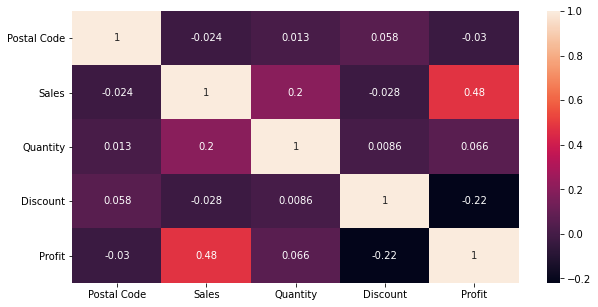

In [16]:
#correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

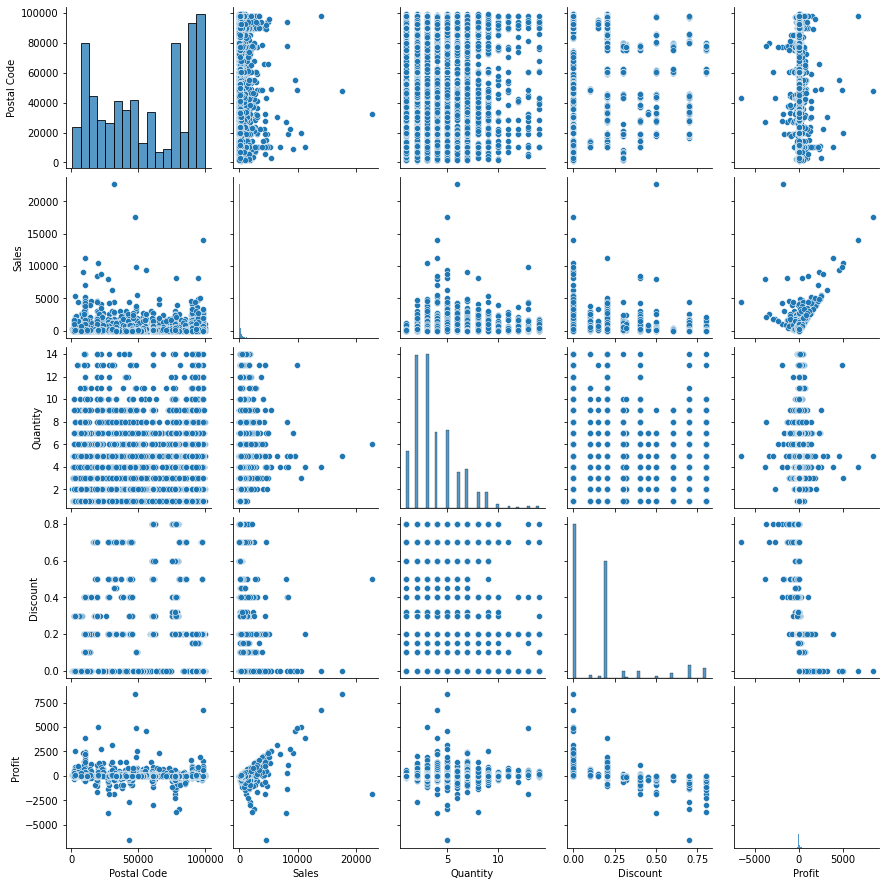

In [13]:
sns.pairplot(df)
plt.show()

In [17]:
df['Cost'] = df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [18]:
df['Profit %'] = (df['Profit']/df['Cost'])*100

In [19]:
df.sort_values(['Profit %','Sub-Category'],ascending=False).groupby('Profit %').head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,Second Class,Home Office,United States,Bayonne,New Jersey,7002,East,Technology,Phones,104.980,2,0.0,52.4900,52.4900,100.000000
2592,Second Class,Corporate,United States,Summerville,South Carolina,29483,South,Technology,Phones,79.100,2,0.0,39.5500,39.5500,100.000000
6338,Standard Class,Corporate,United States,New York City,New York,10035,East,Technology,Phones,87.800,4,0.0,43.9000,43.9000,100.000000
246,Second Class,Home Office,United States,Lakeville,Minnesota,55044,Central,Office Supplies,Paper,47.880,6,0.0,23.9400,23.9400,100.000000
381,First Class,Corporate,United States,San Francisco,California,94109,West,Office Supplies,Paper,50.960,7,0.0,25.4800,25.4800,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,Standard Class,Corporate,United States,Austin,Texas,78745,Central,Office Supplies,Appliances,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,Standard Class,Corporate,United States,Fort Worth,Texas,76106,Central,Office Supplies,Appliances,24.588,3,0.8,-67.6170,92.2050,-73.333333
9164,Standard Class,Consumer,United States,Chicago,Illinois,60610,Central,Office Supplies,Appliances,143.128,2,0.8,-393.6020,536.7300,-73.333333
261,Standard Class,Corporate,United States,Pasadena,Texas,77506,Central,Office Supplies,Appliances,1.624,2,0.8,-4.4660,6.0900,-73.333333


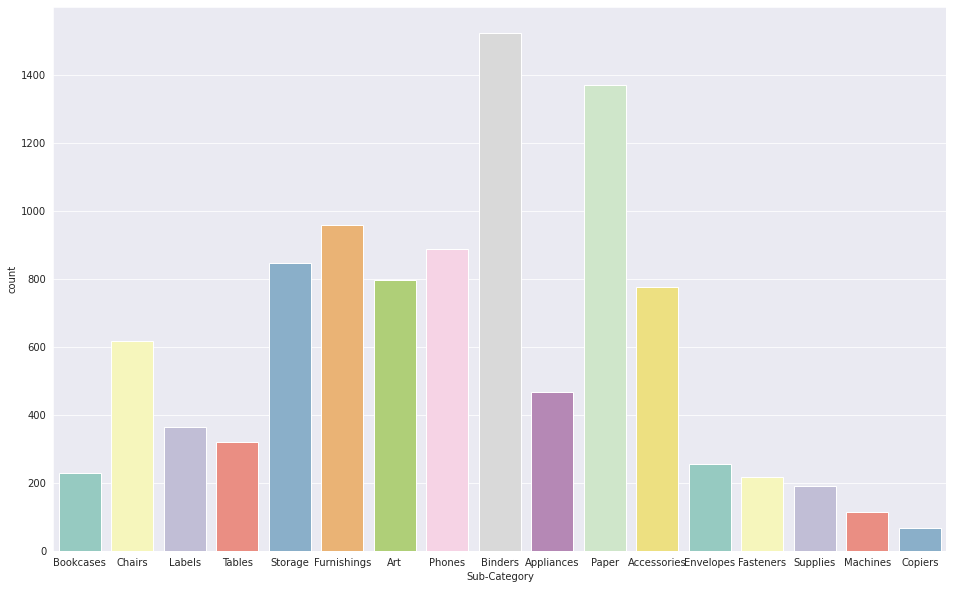

In [20]:
plt.figure(figsize=(16,10))
sns.set_style("darkgrid")
sns.countplot(x='Sub-Category',data=df,palette='Set3')

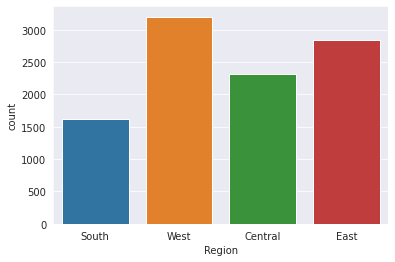

In [22]:
sns.countplot(x='Region',data=df)

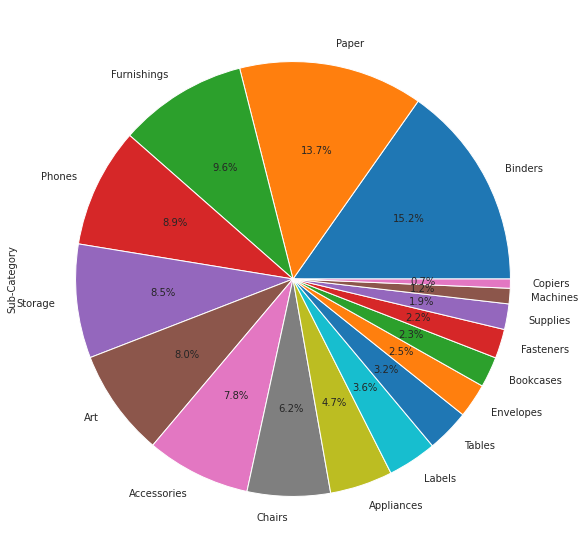

In [23]:
#pie chart
plt.figure(figsize=(10,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")

From the above pie-chart we get info that Paper and Blinders are the most occured sub-category



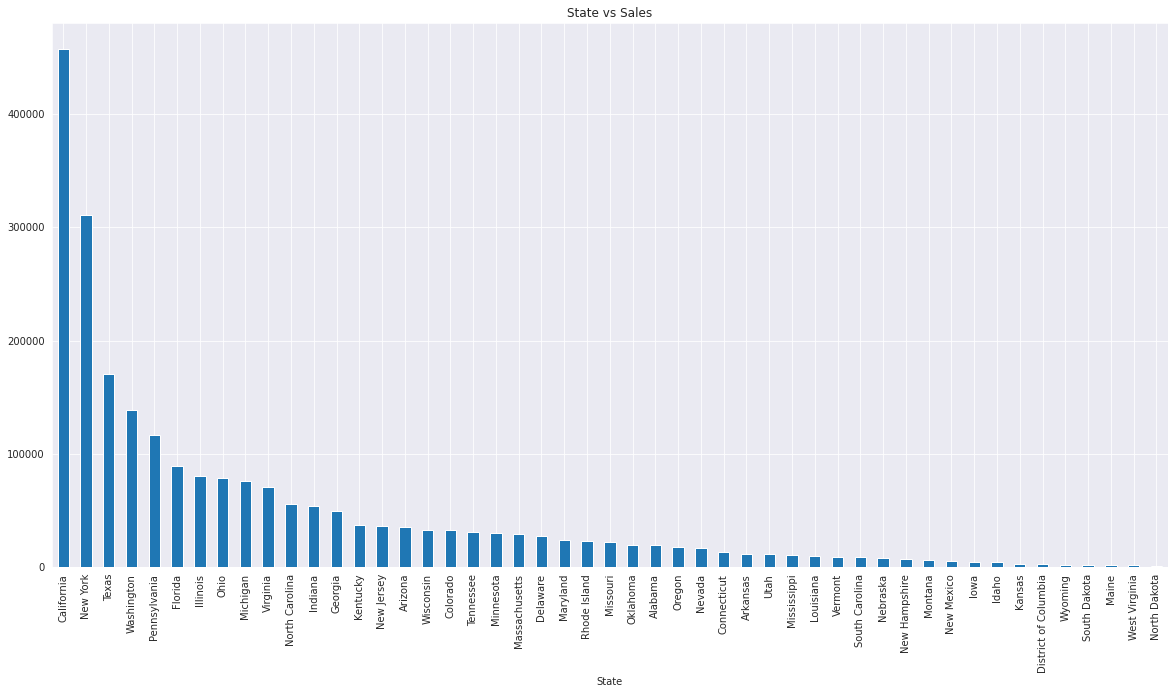

In [24]:
#state wise sales
statewise=df.groupby(['State'])['Sales'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title('State vs Sales')
statewise.plot.bar()

we can conclude from above graph that California has highest number of sales.

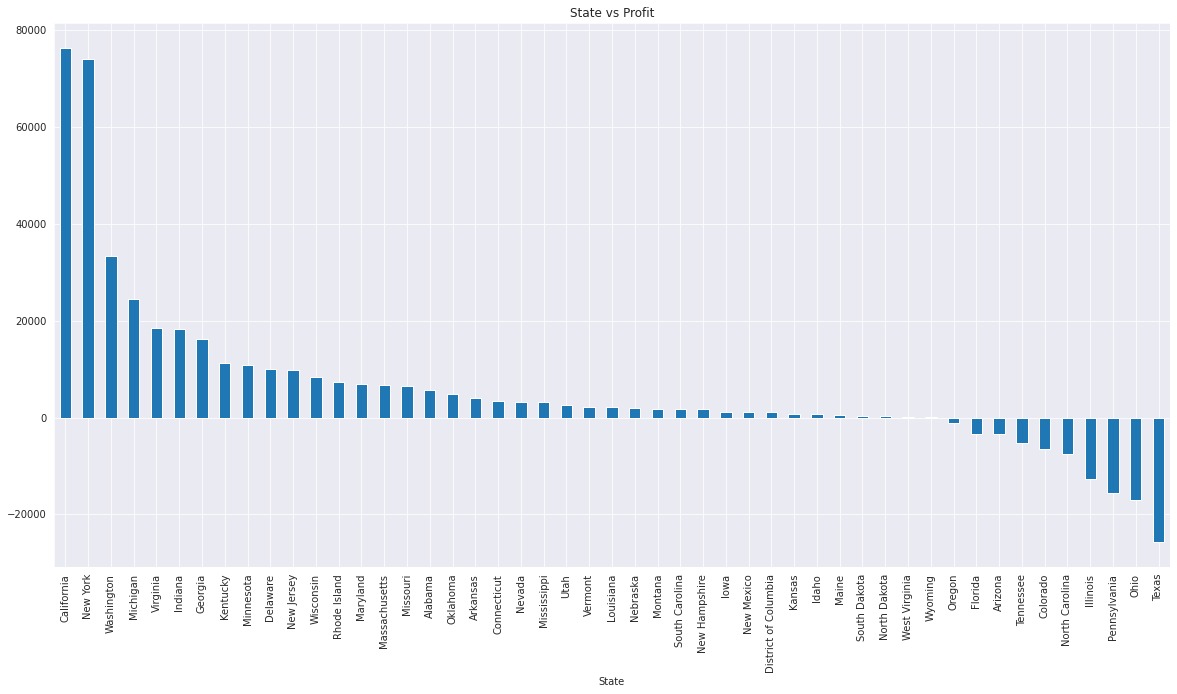

In [25]:
#state wise profit
statewise=df.groupby(['State'])['Profit'].sum()
statewise.sort_values(ascending=False,inplace=True)
fig, ax = plt.subplots(figsize=(20,10))
plt.title("State vs Profit")
statewise.plot.bar()

we can conclude from above graph that California has the highest profit and next New York takes the 2nd highest sales.

# THANKYOU!!